In [23]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Задача 12

Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [2]:
col_names = ['Sort','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [3]:
data = pd.read_csv('wine.csv',header=None,names=col_names)
data.head()

,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Мысль1 : все признаки вещественные

In [4]:
data.describe()

,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\frizman04\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


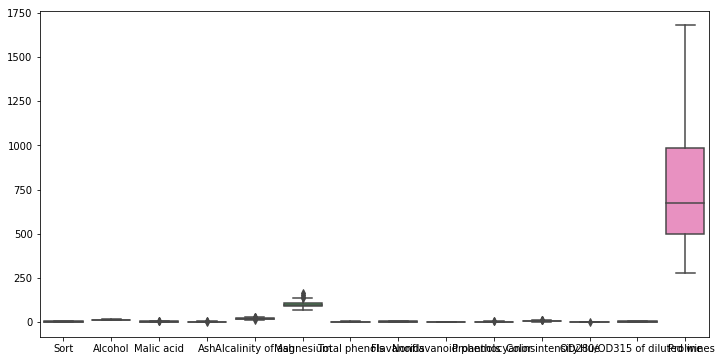

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[ col_names[0:len(col_names)] ])
plt.show()

### Мысль2 :  В данных отсутствуют пропуски

## KNN

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn import preprocessing

from sklearn.ensemble import VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Мысль3 : Признаки отличаются на порядки, по скольку KNN метрический алгоритм - признаки нужно отнормировать

In [7]:
y = data[ col_names[0] ].values
X = data[ col_names[1:]].values

X = preprocessing.scale(X,axis=0)

print(y.shape)
print(X.shape)

(178,)
(178, 13)


### Мысль4 : асамблируем с 3мя разными метрками близости

In [24]:
matplotlib.rcParams.update({'font.size': 22})

Min error : 0.0224, it was with 16 neighbors


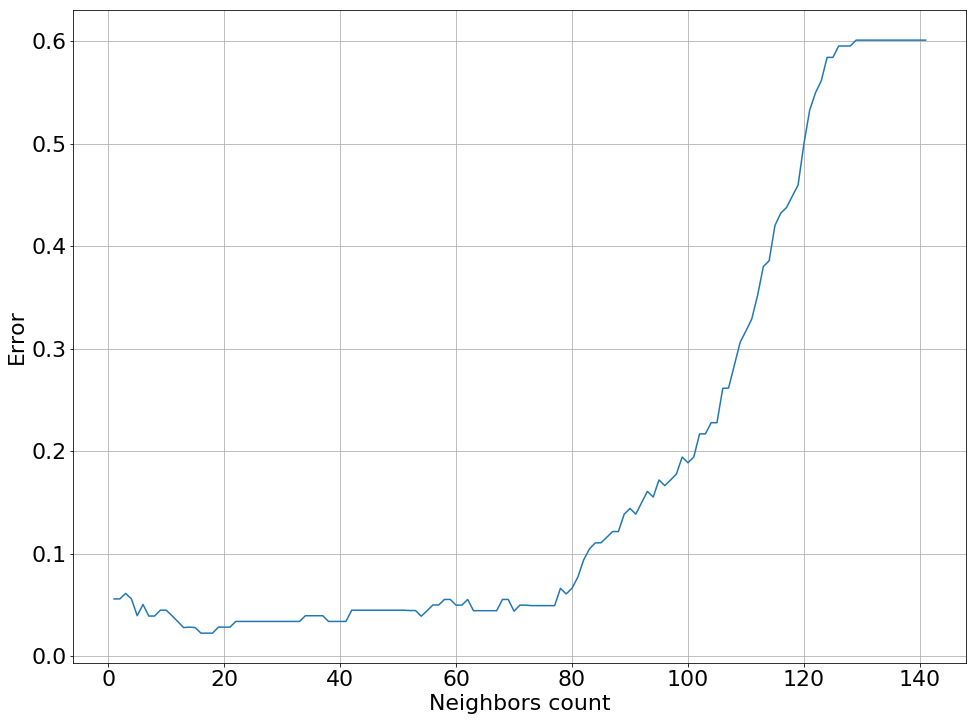

In [25]:
n_split = 5
metric_names = ['euclidean','chebyshev','manhattan']  #евклид, максм модулей, сумма модулей
max_neighbors_cnt = int(len(X) - len(X) / n_split)

err_list = []
for neighbors_cnt in range(1,max_neighbors_cnt) :    
    
    clf = VotingClassifier(estimators=[('knn_' + metric_name,
                                        KNeighborsClassifier(n_neighbors=neighbors_cnt,
                                                             metric=metric_name,
                                                             weights='uniform'))
                                        for metric_name in metric_names],
                           voting='soft')
    
    acc = cross_val_score(clf,X,y,cv=n_split,scoring='accuracy')
    acc = acc.mean()
    err_list.append(1 - acc)

best_error = np.min(err_list)
best_neighbors_cnt = np.argmin(err_list) + 1
print('Min error : %.4f, it was with %.f neighbors' % (best_error,best_neighbors_cnt))


plt.figure(figsize=(16,12))
plt.grid(True)


plt.plot(list(range(1,max_neighbors_cnt)),err_list)
plt.xlabel('Neighbors count')
plt.ylabel('Error')


plt.savefig(fname='Error_from_Neighborscnt.png',format='png')
plt.show()